In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
tsum_parsing = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
display(tsum_parsing)
tsum_company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')
display(tsum_company)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [19]:
def replace_function(feature):
    for char in ['_', '-', '~', '\\', '/']:
            feature = feature.replace(char,'')
    return feature

In [21]:
display(replace_function('~~~red'))

'red'

In [22]:
tsum_parsing['producer_color'] = tsum_parsing['producer_color'].apply(replace_function)
display(tsum_parsing)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,black,196
4,Valentino,Shoes,aaaaa1111_15,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,red,164
71,Stone Island,Bags,sssss1111_32,red,158
72,Stone Island,Bags,sssss1111_33,red,194
73,Stone Island,Bags,sssss1111_34,red,256


In [24]:
tsum_parsing['producer_id'] = tsum_parsing['producer_id'].apply(replace_function)
display(tsum_parsing)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [27]:
tsum_company_subtable = tsum_company[['item_id', 'color_id', 'current price']]
display(tsum_company_subtable)

,item_id,color_id,current price
0,aaaaa111111,black,247
1,aaaaa111112,black,161
2,aaaaa111113,black,234
3,aaaaa111114,black,167
4,aaaaa111115,black,153
...,...,...,...
70,sssss111131,red,165
71,sssss111132,red,196
72,sssss111133,red,236
73,sssss111134,red,222


In [31]:
tsum_include = pd.concat([tsum_parsing, tsum_company_subtable], axis=1)
display(tsum_include.head(7))

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153
5,Valentino,Shoes,aaaaa111116,black,191,aaaaa111116,black,265
6,Valentino,Shoes,aaaaa111117,black,218,aaaaa111117,black,169


In [35]:
tsum_include['diff_price_%'] = (tsum_include['price'] - tsum_include['current price']) / tsum_include['current price'] * 100
# display(tsum_include['diff_price'])
display(tsum_include)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,diff_price,diff_price_%
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.388664,-32.388664
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.770186,16.770186
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.367521,-21.367521
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.365269,17.365269
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.398693,63.398693
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.606061,-0.606061
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.387755,-19.387755
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.796610,-17.796610
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.315315,15.315315


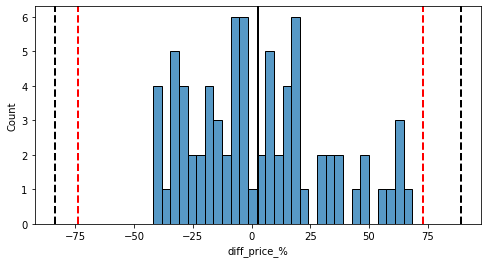

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
histplot = sns.histplot(tsum_include['diff_price_%'], bins=30, ax=ax)
histplot.axvline(tsum_include['diff_price_%'].mean(), color='k', lw=2)
histplot.axvline(tsum_include['diff_price_%'].mean()+ 3 * tsum_include['diff_price_%'].std(), color='k', ls='--', lw=2)
histplot.axvline(tsum_include['diff_price_%'].mean()- 3 * tsum_include['diff_price_%'].std(), color='k', ls='--', lw=2)
iqr = tsum_include['diff_price_%'].quantile(0.75) - tsum_include['diff_price_%'].quantile(0.25)
histplot.axvline(tsum_include['diff_price_%'].quantile(0.25) - 1.5 * iqr, color='r', ls='--', lw=2)
histplot.axvline(tsum_include['diff_price_%'].quantile(0.75) + 1.5 * iqr, color='r', ls='--', lw=2)


In [41]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3, zero=0):
    
    if log_scale:
        x = np.log(data[feature]+1*zero)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [45]:
outliers, cleaned = outliers_z_score_mod(tsum_include, 'diff_price_%', log_scale=False, left=3, right=3)
display(outliers)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,diff_price,diff_price_%


In [49]:
from pandas.io.excel import ExcelWriter

In [50]:
tsum_include.to_excel( 'data/Data_TSUM_complex.xlsx' )

In [156]:
table = pd.DataFrame() 
#brand_category = tsum_include.groupby(['brand'],as_index=False)['diff_price_%'].agg(['mean', 'std','count'])
#category_brand = tsum_include.groupby(['Category'],as_index=False)['diff_price_%'].agg(['mean', 'std','count'])
display(tsum_include['brand'].value_counts().index)
display(tsum_include['Category'].value_counts().index)
#display(category_brand.index)
for brand_item in tsum_include['brand'].value_counts().index:
    display(brand_item)
    for category_item in tsum_include['Category'].value_counts().index:
        mask_1 = tsum_include['brand'] == brand_item
        mask_2 = tsum_include['Category'] == category_item
        table_help = pd.DataFrame()
        table_help = tsum_include[mask_1 & mask_2]
        # display(tsum_include[mask_1 & mask_2])
        # fig, ax = plt.subplots(1, 1, figsize=(8, 4))
        # histplot = sns.histplot(tsum_include[mask_1 & mask_2]['diff_price_%'], bins=30, ax=ax)
        #outliers, cleaned = outliers_z_score_mod(tsum_include[mask_1 & mask_2], 'diff_price_%', log_scale=False, left=3, right=3)
        
        #histplot.axvline(tsum_include[mask_1 & mask_2]['diff_price_%'].mean(), color='k', lw=2)
        #histplot.axvline(tsum_include[mask_1 & mask_2]['diff_price_%'].mean()+ 3 * tsum_include['diff_price_%'].std(), color='k', ls='--', lw=2)
        #histplot.axvline(tsum_include[mask_1 & mask_2]['diff_price_%'].mean()- 3 * tsum_include['diff_price_%'].std(), color='k', ls='--', lw=2)
        iqr = table_help['diff_price_%'].quantile(0.75) - table_help['diff_price_%'].quantile(0.25)
        #histplot.axvline(tsum_include[mask_1 & mask_2]['diff_price_%'].quantile(0.25) - 1.5 * iqr, color='r', ls='--', lw=2)
        #histplot.axvline(tsum_include[mask_1 & mask_2]['diff_price_%'].quantile(0.75) + 1.5 * iqr, color='r', ls='--', lw=2)
        
        lower_bound = table_help['diff_price_%'].quantile(0.25) - 1.5 * iqr
        upper_bound = table_help['diff_price_%'].quantile(0.75) + 1.5 * iqr
        
        table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')
        table = pd.concat([table,table_help],ignore_index=True, axis=0)
        display(table_help.shape)
        
#display(brand_category.values)
#display(brand_category['Brioni',  'Bags'])
# for brand_item in tsum_include['brand']:
   #  for category_item in tsum_include['Category']:
      #  display(brand_item, category_item)
# tsum_include['brand'].nunique()
display(table)
display(table['outlier'].value_counts())

Index(['Valentino', 'Brioni', 'Stone Island'], dtype='object')

Index(['Shoes', 'Bags'], dtype='object')

'Valentino'

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(14, 11)

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(11, 11)

'Brioni'

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(14, 11)

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(11, 11)

'Stone Island'

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(14, 11)

C:\Users\Arwielao\AppData\Local\Temp\ipykernel_20412\1342768157.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_help['outlier'] = table_help['diff_price_%'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')


(11, 11)

,brand,Category,producer_id,producer_color,price,item_id,color_id,current price,diff_price,diff_price_%,outlier
0,Valentino,Shoes,aaaaa111111,black,167,aaaaa111111,black,247,-32.388664,-32.388664,No
1,Valentino,Shoes,aaaaa111112,black,188,aaaaa111112,black,161,16.770186,16.770186,No
2,Valentino,Shoes,aaaaa111113,black,184,aaaaa111113,black,234,-21.367521,-21.367521,No
3,Valentino,Shoes,aaaaa111114,black,196,aaaaa111114,black,167,17.365269,17.365269,No
4,Valentino,Shoes,aaaaa111115,black,250,aaaaa111115,black,153,63.398693,63.398693,No
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,sssss111131,red,165,-0.606061,-0.606061,No
71,Stone Island,Bags,sssss111132,red,158,sssss111132,red,196,-19.387755,-19.387755,No
72,Stone Island,Bags,sssss111133,red,194,sssss111133,red,236,-17.796610,-17.796610,No
73,Stone Island,Bags,sssss111134,red,256,sssss111134,red,222,15.315315,15.315315,No


No     70
Yes     5
Name: outlier, dtype: int64

In [157]:
table.to_excel( 'data/Data_TSUM_complex_outliar.xlsx' )